# Sentinel-3 <img align="right" src="../Supplementary_data/DE_Africa_Logo_Stacked_RGB_small.jpg">


* **Products used:** 
[s3_olci_l2_lfr](https://explorer.digitalearth.africa/products/s3_olci_l2_lfr)

## Background



## Description



***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

In [2]:
%matplotlib inline
import datacube
from deafrica_tools.plotting import display_map

In [3]:
dc = datacube.Datacube(app="Sentinel_3")

In [4]:
dc.list_products().loc[dc.list_products()['description'].str.contains('Sentinel-3')]

,name,description,license,default_crs,default_resolution
name,,,,,
s3_ol_2_wfr_nrt,s3_ol_2_wfr_nrt,Sentinel-3 Level 2 Water Full Resolution (WFR)...,CC-BY-4.0,EPSG:4326,"(-0.003, 0.003)"
s3_olci_l2_lfr,s3_olci_l2_lfr,Sentinel-3 OLCI L2 LAND,CC-BY-4.0,EPSG:4326,"(-0.003, 0.003)"
s3_olci_l2_wfr,s3_olci_l2_wfr,Sentinel-3 OLCI L2 WATER,CC-BY-4.0,EPSG:4326,"(-0.003, 0.003)"
s3_syn_2_vg1,s3_syn_2_vg1,Sentinel-3 Level-2 VG1 SYN product,CC-BY-4.0,EPSG:4326,"(-0.003, 0.003)"


In [5]:
product = "s3_syn_2_vg1"

### List measurements

We can further inspect the data available for each SAR product using datacube's `list_measurements` functionality. The table below lists each of the measurements available in the data.

In [6]:
measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition,add_offset,scale_factor
measurement,,,,,,,,
AG_VG1,AG_VG1,uint8,1,255,[aerosol_optical_thickness],NaN,0.0,1.0000
B0_VG1,B0_VG1,int16,1,32767,NaN,NaN,0.0,0.0001
B2_VG1,B2_VG1,int16,1,32767,NaN,NaN,0.0,0.0001
B3_VG1,B3_VG1,int16,1,32767,NaN,NaN,0.0,0.0001
MIR_VG1,MIR_VG1,int16,1,32767,[middle_infrared],NaN,0.0,0.0001
NDVI_VG1,NDVI_VG1,int16,1,32767,NaN,NaN,0.0,0.0001
OG_VG1,OG_VG1,uint8,atm.cm,255,[total_column_ozone],NaN,0.0,1.0000
SAA_VG1,SAA_VG1,int16,degrees,32767,[solar_azimuth_angle],NaN,0.0,1.0000
SZA_VG1,SZA_VG1,uint8,degrees,255,[solar_zenith_angle],"{'mask': {'bits': [0, 1, 2, 3, 4, 8, 16, 32, 6...",0.0,1.0000


In [9]:
latitude = -33.92
longitude = 18.42
buffer = 0.4
time = ('2025-05')

In [10]:
display_map(x=(longitude-buffer, longitude+buffer), y=(latitude+buffer, latitude-buffer))

In [11]:
query = {
    'x': (longitude-buffer, longitude+buffer),
    'y': (latitude+buffer, latitude-buffer),
    'time':time,
    'output_crs': 'EPSG:4326',
    'resolution': (0.003, 0.003)}

In [12]:
ds_S3 = dc.load(product=product,
                group_by="solar_day",
                **query)

ds_S3

<xarray.Dataset> Size: 21MB
Dimensions:       (time: 14, latitude: 267, longitude: 268)
Coordinates:
  * time          (time) datetime64[ns] 112B 2025-05-01 ... 2025-05-14
  * latitude      (latitude) float64 2kB -34.32 -34.32 -34.31 ... -33.52 -33.52
  * longitude     (longitude) float64 2kB 18.02 18.02 18.03 ... 18.82 18.82
    spatial_ref   int32 4B 4326
Data variables: (12/13)
    AG_VG1        (time, latitude, longitude) uint8 1MB 255 255 255 ... 0 0 0
    B0_VG1        (time, latitude, longitude) int16 2MB 32767 32767 ... 614 614
    B2_VG1        (time, latitude, longitude) int16 2MB 32767 32767 ... 1741
    B3_VG1        (time, latitude, longitude) int16 2MB 32767 32767 ... 3257
    MIR_VG1       (time, latitude, longitude) int16 2MB 32767 32767 ... 3790
    NDVI_VG1      (time, latitude, longitude) int16 2MB 32767 32767 ... 3040
    ...            ...
    SAA_VG1       (time, latitude, longitude) int16 2MB 32767 32767 ... 44 44
    SZA_VG1       (time, latitude, longitude) uint8 1MB 255 255 255 ... 65 65 65
    TOA_NDVI_VG1  (time, latitude, longitude) int16 2MB 32767 32767 ... 2840
    VAA_VG1       (time, latitude, longitude) int16 2MB 32767 32767 ... 107 107
    VZA_VG1       (time, latitude, longitude) uint8 1MB 255 255 255 ... 38 38 38
    WVG_VG1       (time, latitude, longitude) uint8 1MB 255 255 255 ... 1 1 1
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

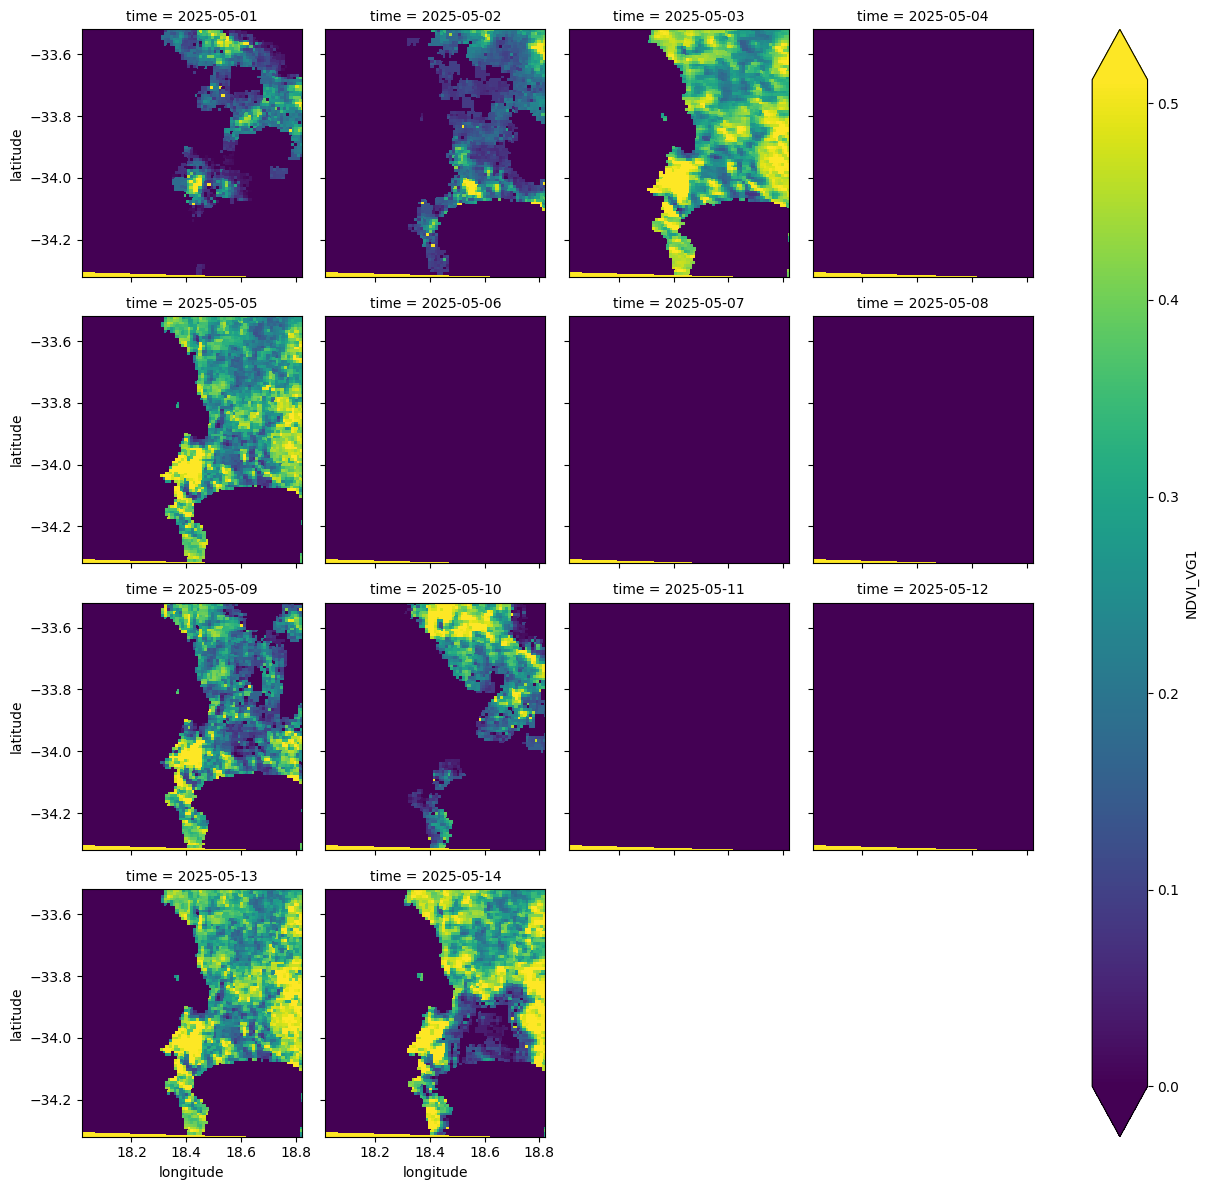

In [15]:
(ds_S3['NDVI_VG1']*0.0001).plot(robust=True, col="time", col_wrap=4);

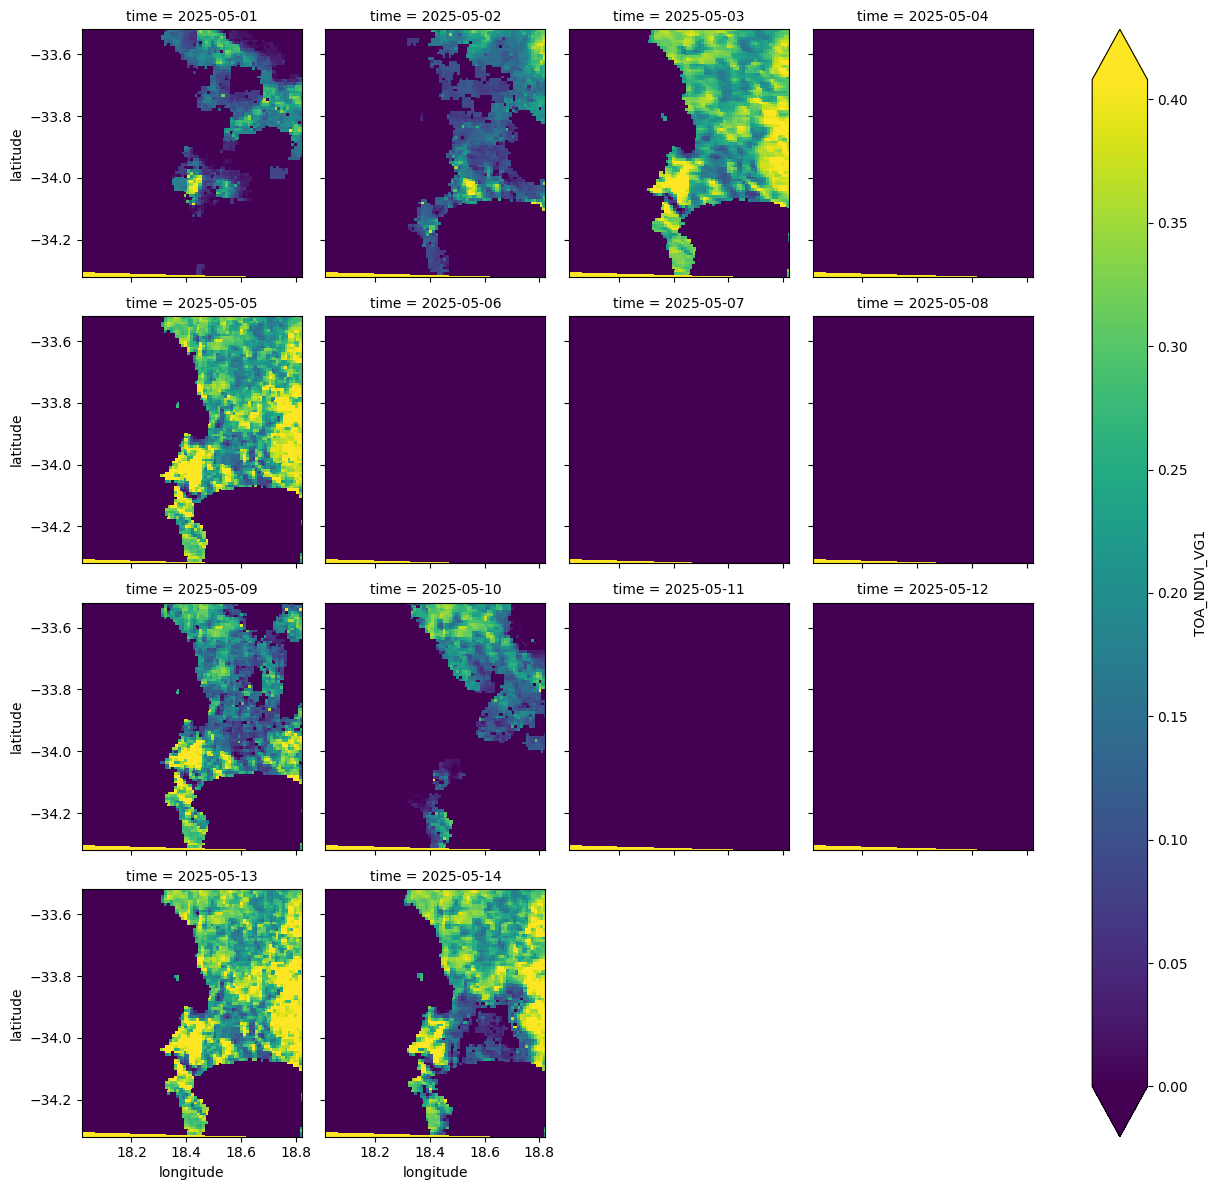

In [16]:
(ds_S3['TOA_NDVI_VG1']*0.0001).plot(robust=True, col="time", col_wrap=4);

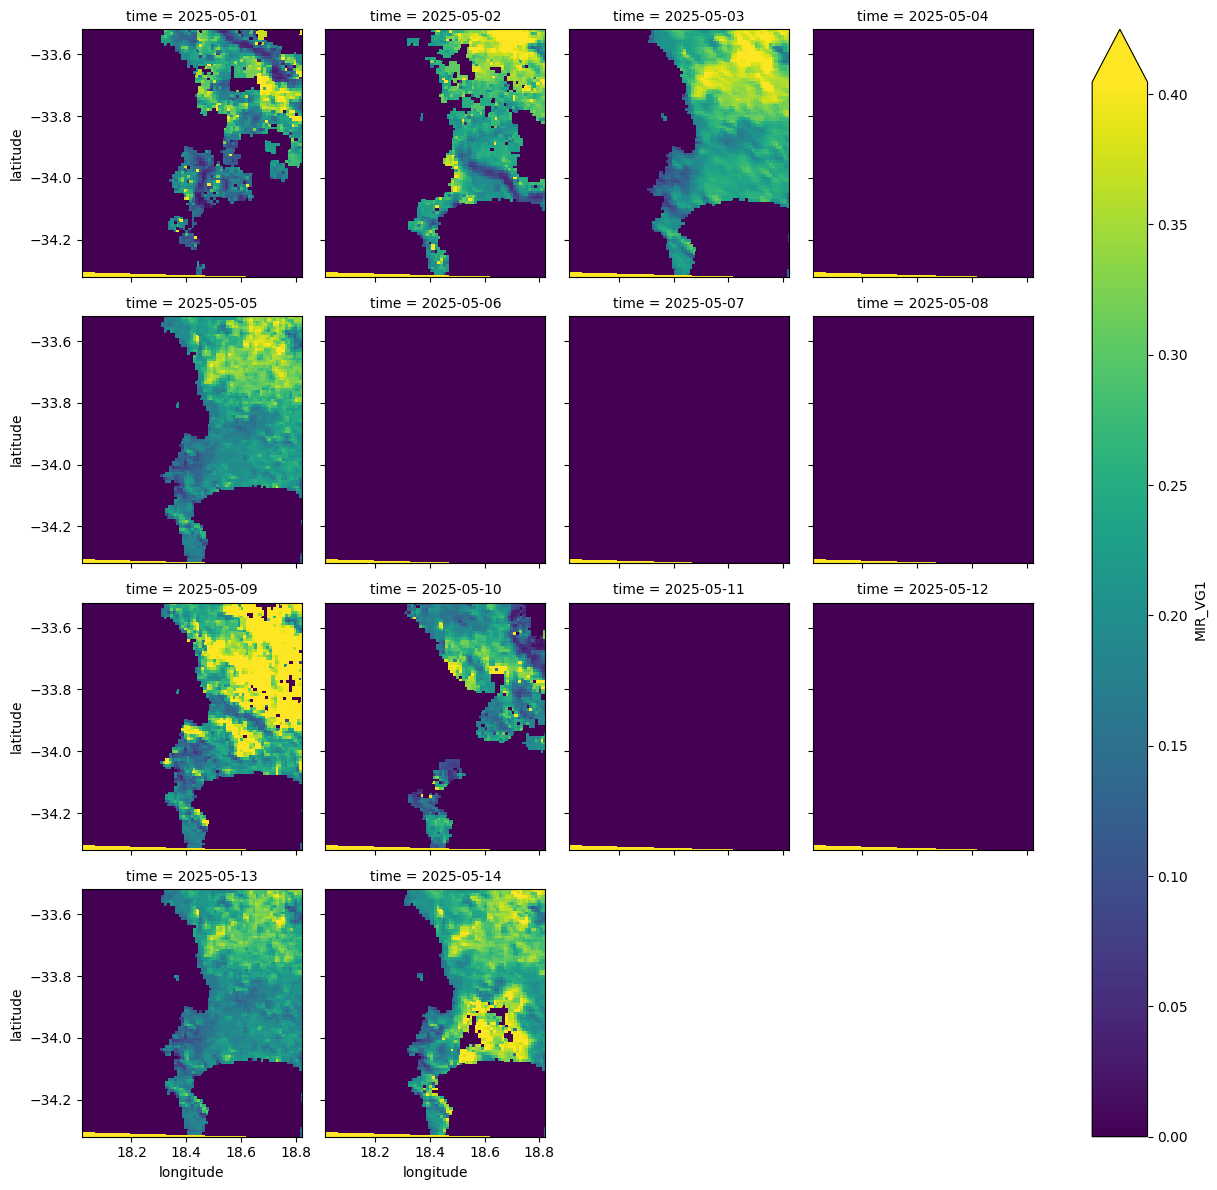

In [18]:
(ds_S3['MIR_VG1']*0.0001).plot(robust=True, col="time", col_wrap=4);